In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [3]:
pd.__version__

'0.24.2'

In [4]:
"""
At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays
in which the rows and columns are identified with labels rather than simple integer indices. 
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, 
and functionality on top of the basic data structures, but nearly everything that follows will 
require an understanding of what these structures are. 
Thus, before we go any further, let's introduce these three fundamental Pandas data structures
: the Series, DataFrame, and Index.

A Pandas Series is a one-dimensional array of indexed data. 
It can be created from a list or array as follows:
"""

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
"""
As we see in the output, the Series wraps both a sequence of values and a sequence of indices, 
which we can access with the values and index attributes.
The values are simply a familiar NumPy array:

"""
data.values


array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [9]:
"""
As we will see, though, the Pandas Series is much more general and flexible 
than the one-dimensional NumPy array that it emulates

From what we've seen so far, it may look like the Series object is basically interchangeable
with a one-dimensional NumPy array. The essential difference is the presence of the index: 
while the Numpy Array has an implicitly defined integer index used to access the values, 
the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. 
For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:
"""
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [12]:
"""
In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary.
The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly
from a Python dictionary:
"""

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [13]:
population['California']

38332521

In [15]:
"""
Unlike a dictionary, though, the Series also supports array-style operations such as slicing:
We'll discuss some of the quirks of Pandas indexing and slicing in Data Indexing and Selection.
切片和列表的有所不同 一般列表不包含右边界 这里包括
"""

population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [16]:
"""

Constructing Series objects
We've already seen a few ways of constructing a Pandas Series from scratch; 
all of them are some version of the following:
>>> pd.Series(data, index=index)
where index is an optional argument, and data can be one of many entities.
For example, data can be a list or NumPy array, in which case index defaults to an integer sequence:

"""

pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [17]:
"""
data can be a scalar, which is repeated to fill the specified index:

"""

pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [18]:
"""
data can be a dictionary, in which index defaults to the sorted dictionary keys:

"""

pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [19]:
"""
In each case, the index can be explicitly set if a different result is preferred:
Notice that in this case, the Series is populated only with the explicitly identified keys.

"""

pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [20]:
"""
The next fundamental structure in Pandas is the DataFrame. 
Like the Series object discussed in the previous section, the DataFrame can be thought of 
either as a generalization of a NumPy array, or as a specialization of a Python dictionary. 
We'll now take a look at each of these perspectives.

"""


area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [21]:
"""
Now that we have this along with the population Series from before, 
we can use a dictionary to construct a single two-dimensional object containing this information:

"""

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
"""

Like the Series object, the DataFrame has an index attribute that gives access to the index labels:

"""

states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [23]:
"""
Additionally, the DataFrame has a columns attribute, which is an Index object holding the column labels:

"""

states.columns

Index(['population', 'area'], dtype='object')

In [24]:
"""
Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, 
where both the rows and columns have a generalized index for accessing the data.

"""

states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
"""
Notice the potential point of confusion here: in a two-dimesnional NumPy array, 
data[0] will return the first row. For a DataFrame, data['col0'] will return the first column.
Because of this, it is probably better to think about DataFrames as generalized dictionaries
rather than generalized arrays, though both ways of looking at the situation can be useful. 
We'll explore more flexible means of indexing DataFrames in Data Indexing and Selection.

"""

"""

A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed 
from a single Series:

"""

pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [26]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [27]:
"""
Even if some keys in the dictionary are missing, Pandas will fill 
them in with NaN (i.e., "not a number") values:
"""

pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [28]:
"""
Given a two-dimensional array of data, we can create a DataFrame with any 
specified column and index names. If omitted, an integer index will be used for each:

"""

pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.849256,0.234963
b,0.676842,0.108666
c,0.888027,0.756756


In [29]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [30]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [31]:
"""
We have seen here that both the Series and DataFrame objects contain an explicit index 
that lets you reference and modify data. This Index object is an interesting structure in itself,
and it can be thought of either as an immutable array or as an ordered set 
(technically a multi-set, as Index objects may contain repeated values).
Those views have some interesting consequences in the operations available on Index objects. 
As a simple example, let's construct an Index from a list of integers:

"""

ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [32]:
"""
The Index in many ways operates like an array. 
For example, we can use standard Python indexing notation to retrieve values or slices:
"""

ind[1]

3

In [33]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [34]:
"""
Index objects also have many of the attributes familiar from NumPy arrays:

"""

print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [35]:
"""
One difference between Index objects and NumPy arrays is that indices are immutable–that is, 
they cannot be modified via the normal means:

ind[1] = 0 #raise error

This immutability makes it safer to share indices between multiple DataFrames and arrays, 
without the potential for side effects from inadvertent index modification.
"""

"""
Pandas objects are designed to facilitate operations such as joins across datasets, 
which depend on many aspects of set arithmetic. 
The Index object follows many of the conventions used by Python's built-in set data structure, 
so that unions, intersections, differences, and other combinations can be computed in a familiar way:

"""

indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])


In [36]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [37]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [38]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

In [39]:
"""
Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. 
If you have used the NumPy patterns, the corresponding patterns in Pandas will feel very familiar, 
though there are a few quirks to be aware of.
大部分和numpy的ndarray一直 但是有些地方不同

We'll start with the simple case of the one-dimensional Series object, 
and then move on to the more complicated two-dimesnional DataFrame object.
"""

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [40]:
"""
We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

"""

'a' in data

True

In [41]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [42]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [43]:
"""
Series objects can even be modified with a dictionary-like syntax. 
Just as you can extend a dictionary by assigning to a new key, 
you can extend a Series by assigning to a new index value:

"""


data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [44]:
"""
A Series builds on this dictionary-like interface and provides array-style item selection via
the same basic mechanisms as NumPy arrays – that is, slices, masking, and fancy indexing. 
Examples of these are as follows:
"""


# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [45]:
# slicing by implicit integer index
data[0:2] #显示指定index后 原本默认的整数index会隐藏 但仍可以调用

a    0.25
b    0.50
dtype: float64

In [46]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [47]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [48]:
"""
切片与python列表不同
Among these, slicing may be the source of the most confusion. 
Notice that when slicing with an explicit index (i.e., data['a':'c']), 
the final index is included in the slice, while when slicing with an implicit index (i.e., data[0:2]),
the final index is excluded from the slice.

"""

"""
These slicing and indexing conventions can be a source of confusion. 
For example, if your Series has an explicit integer index, 
an indexing operation such as data[1] will use the explicit indices, 
while a slicing operation like data[1:3] will use the implicit Python-style index.

"""


data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [49]:
# explicit index(1,3,5)when indexing
data[1]

'a'

In [51]:
# implicit  Python-style index(0,1,2) when slicing
data[1:3] #1 2 not 3 1 2is the index

3    b
5    c
dtype: object

In [54]:
"""
Because of this potential confusion in the case of integer indexes, 
Pandas provides some special indexer attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing 
interface to the data in the Series.
First, the loc attribute allows indexing and slicing that always references the explicit index:
也就是用loc一直是使用1 3 5index 而不是python默认的 0 1 2
"""

data.loc[1]

'a'

In [55]:

data.loc[1:3]

1    a
3    b
dtype: object

In [58]:
"""

The iloc attribute allows indexing and slicing that always references the implicit Python-style index:
iloc是一直使用python默认的0 1 2 不管pandas里面的explicit index

"""

data.iloc[1]

'b'

In [59]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [60]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [61]:
"""
The individual Series that make up the columns of the DataFrame can be accessed
via dictionary-style indexing of the column name:

"""

data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [62]:
data.iloc[1]#隐式index

area      695662
pop     26448193
Name: Texas, dtype: int64

In [64]:
data.loc['Texas'] #显式index

area      695662
pop     26448193
Name: Texas, dtype: int64

In [65]:
data.area is data['area']
"""
Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, 
or if the column names conflict with methods of the DataFrame, 
this attribute-style access is not possible. 
For example, the DataFrame has a pop() method, 
so data.pop will point to this rather than the "pop" column:

In particular, you should avoid the temptation to try column assignment via attribute 
(i.e., use data['pop'] = z rather than data.pop = z).

"""

True

In [67]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [68]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [70]:
"""
As mentioned previously, we can also view the DataFrame as an enhanced two-dimensional array. 
We can examine the raw underlying data array using the values attribute:
"""
data.values


array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [71]:
"""
With this picture in mind, many familiar array-like observations can be done on the DataFrame itself. 
For example, we can transpose the full DataFrame to swap rows and columns:
通过转置操作 交换行和列
"""

data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [72]:
"""
When it comes to indexing of DataFrame objects, however, 
it is clear that the dictionary-style indexing of columns precludes our ability to
simply treat it as a NumPy array. In particular, passing a single index to an array accesses a row:

"""
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [73]:
"""

and passing a single "index" to a DataFrame accesses a column:

"""

data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [75]:
"""
Thus for array-style indexing, we need another convention. 
Here Pandas again uses the loc, iloc, and ix indexers mentioned earlier.
Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array 
(using the implicit Python-style index), 
but the DataFrame index and column labels are maintained in the result:

"""

data.iloc[:3, :2]#数据切片 但是the DataFrame index and column labels are maintained in the result

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [76]:
"""
Similarly, using the loc indexer we can index the underlying data in an array-like style 
but using the explicit index and column names:

"""

data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [78]:
"""
The ix indexer allows a hybrid of these two approaches:
data.ix[:3, :'pop']
 DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing
"""

"""
Any of the familiar NumPy-style data access patterns can be used within these indexers. 
For example, in the loc indexer we can combine masking and fancy indexing as in the following:

"""

data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [79]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [80]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [81]:
"""
Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and 
DataFrame objects. Let's start by defining a simple Series and DataFrame on which to demonstrate this:

"""

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [82]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [83]:
"""
If we apply a NumPy ufunc on either of these objects, 
the result will be another Pandas object with the indices preserved:

"""

np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [84]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [85]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [86]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [87]:
"""
The resulting array contains the union of indices of the two input arrays, 
which could be determined using standard Python set arithmetic on these indices:

"""
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [88]:
"""
This index matching is implemented this way for any of Python's built-in arithmetic expressions; 
any missing values are filled in with NaN by default:

"""

A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [90]:
"""

If using NaN values is not the desired behavior, 
the fill value can be modified using appropriate object methods in place of the operators. 
For example, calling A.add(B) is equivalent to calling A + B, 
but allows optional explicit specification of the fill value for any elements in A or B 
that might be missing:

"""


A.add(B, fill_value=0) #A 2 4 6 0 B 0 1 3 5 

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [91]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [92]:

B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [93]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [94]:

A.add(B, fill_value=0)

,A,B,C
0,1.0,15.0,9.0
1,13.0,6.0,0.0
2,2.0,9.0,6.0


In [95]:
fill = A.stack().mean() 
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [96]:
filltest = A.stack() #把 AB也转成索引 只剩下 数字了 可以参考CSDN说明
print(filltest)

0  A     1
   B    11
1  A     5
   B     1
dtype: int32


In [97]:
"""

The following table lists Python operators and their equivalent Pandas object methods:
Python Operator
Pandas Method(s)
+
add()
-
sub(), subtract()
*
mul(), multiply()
/
truediv(), div(), divide()
//
floordiv()
%
mod()
**
pow()

"""

A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [98]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [99]:
"""
In Pandas, the convention similarly operates row-wise by default:
默认按行操作
"""

df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [100]:
"""
If you would instead like to operate column-wise, you can use the object methods mentioned earlier, 
while specifying the axis keyword:

"""

df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [101]:
print(df)

   Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8


In [102]:

halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [103]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


In [104]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [105]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [106]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [107]:

np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [108]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [109]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [110]:
"""

The isnull() and notnull() methods produce similar Boolean results for DataFrames.

In addition to the masking used before, there are the convenience methods, 
dropna() (which removes NA values) and fillna() (which fills in NA values). 
For a Series, the result is straightforward:

"""

data.dropna()

0        1
2    hello
dtype: object

In [111]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [112]:
"""

We cannot drop single values from a DataFrame; we can only drop full rows or full columns. 
Depending on the application, you might want one or the other, 
so dropna() gives a number of options for a DataFrame.
By default, dropna() will drop all rows in which any null value is present:

"""

df.dropna()

,0,1,2
1,2.0,3.0,5


In [113]:
"""
Alternatively, you can drop NA values along a different axis; 
axis=1 drops all columns containing a null value:

"""

df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [114]:
"""

But this drops some good data as well; you might rather be interested in dropping rows or columns
with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters,
which allow fine control of the number of nulls to allow through.
The default is how='any', such that any row or column (depending on the axis keyword) 
containing a null value will be dropped. You can also specify how='all',
which will only drop rows/columns that are all null values:

"""

df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [115]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [117]:
"""
For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values 
for the row/column to be kept:
thresh=3 最少保留的非空值 也就是说大于等于3个非空值 就保留行或者列

"""

df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [118]:
"""
Here the first and last row have been dropped, because they contain only two non-null values.

"""

"""
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. 
This value might be a single number like zero, or it might be some sort of imputation 
or interpolation from the good values. You could do this in-place using the isnull() method as a mask,
but because it is such a common operation Pandas provides the fillna() method,
which returns a copy of the array with the null values replaced.
Consider the following Series:

"""

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [119]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [120]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [121]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [122]:
"""
For DataFrames, the options are similar, 
but we can also specify an axis along which the fills take place:

"""

df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [123]:
df.fillna(method='ffill', axis=1) #axis=1 压缩列的方向 axis=0 压缩行

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [124]:
"""
Notice that if a previous value is not available during a forward fill, the NA value remains.
"""
df.fillna(method='ffill', axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [125]:
"""
Suppose you would like to track data about states from two different years. 
Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:


"""

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [126]:
"""
With this indexing scheme, you can straightforwardly index 
or slice the series based on this multiple index:

"""

pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [127]:
"""
But the convenience ends there. For example, if you need to select all values from 2010, 
you'll need to do some messy (and potentially slow) munging to make it happen:

"""


pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [128]:
"""
This produces the desired result, but is not as clean (or as efficient for large datasets) 
as the slicing syntax we've grown to love in Pandas.

Fortunately, Pandas provides a better way. 
Our tuple-based indexing is essentially a rudimentary multi-index, 
and the Pandas MultiIndex type gives us the type of operations we wish to have. 
We can create a multi-index from the tuples as follows:

"""

index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [129]:
"""
Notice that the MultiIndex contains multiple levels of indexing–in this case, 
the state names and the years, as well as multiple labels for each data point which encode these levels.
If we re-index our series with this MultiIndex, we see the hierarchical representation of the data:

"""

pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [130]:
"""
Here the first two columns of the Series representation show the multiple index values, 
while the third column shows the data. Notice that some entries are missing in the first column:
in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation:
实际上就是2层index 或者也可以理解为2维 1维是城市 2维是年份
"""

pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [131]:
pop_df = pop.unstack() #把双层索引解除 第二层还原为column
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [133]:
pop_df.stack() #把column转换成另一层索引

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [134]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [135]:
f_u18 = pop_df['under18'] / pop_df['total']
print(f_u18)

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64


In [136]:
"""
f_u18保留了双层的索引

"""

f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [137]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.378411  0.642421
  2  0.680140  0.046285
b 1  0.452718  0.481340
  2  0.947469  0.056132

In [138]:
"""
The work of creating the MultiIndex is done in the background.
Similarly, if you pass a dictionary with appropriate tuples as keys,
Pandas will automatically recognize this and use a MultiIndex by default:

"""

data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [139]:

pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [140]:

# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  37.5  39.0  37.1  26.0  38.8
     2      54.0  36.6  40.0  36.6  45.0  36.8
2014 1      32.0  37.1  50.0  36.5  40.0  35.8
     2      29.0  36.7  37.0  37.4  40.0  36.8

In [141]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      39.0  37.1
     2      40.0  36.6
2014 1      50.0  36.5
     2      37.0  37.4

In [143]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [144]:
pop['California', 2000]

33871648

In [145]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [146]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [147]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [148]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [150]:
"""
Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate 
but contains a number of options that we'll discuss momentarily:

"""

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [151]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [155]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', 'pd.concat([df3, df4], axis=1)')

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [156]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [157]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [158]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [159]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


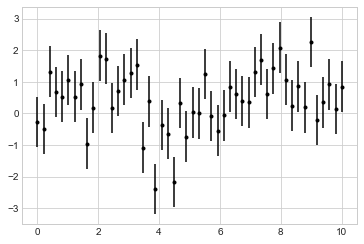

In [161]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

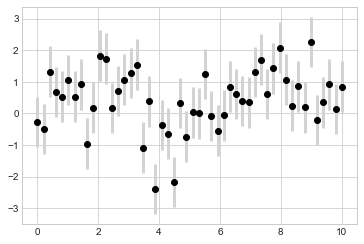

In [162]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


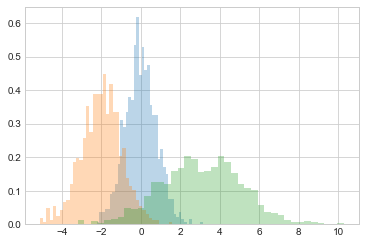

In [165]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

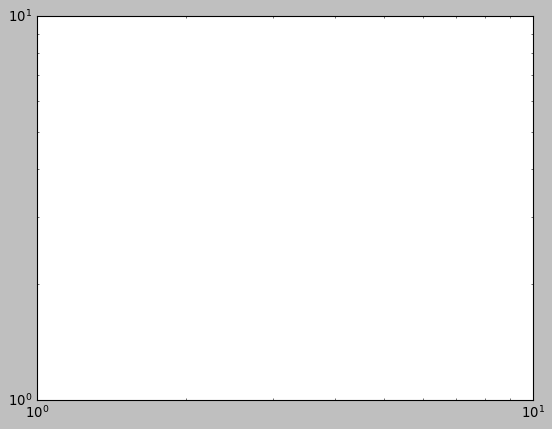

In [166]:
plt.style.use('classic')
ax = plt.axes(xscale='log', yscale='log')
ax.grid();